In [200]:
import numpy
import pandas
import scipy
from scipy.spatial import distance
from matplotlib import pyplot as pyplot
from mpl_toolkits.mplot3d import Axes3D

How does changing kernel functions affect the distribution?

`Key observation: the conditional distribution is not in terms of two variables but n variables. Itconsiders each of the n-observations as their own dimension

# Example 1

## Generate random variable

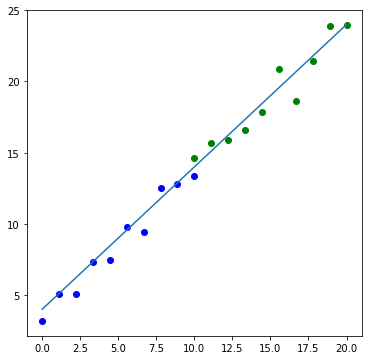

In [633]:
# Create random vars
def f(x):
    return x + 4

numpy.random.seed(433)
x1 = numpy.linspace(0,10,10).reshape(-1,1)
y1 = f(x1) + numpy.random.normal(0,1,10).reshape(-1,1)

x2 = numpy.linspace(10,20,10).reshape(-1,1)
y2 = f(x2) + numpy.random.normal(0,1,10).reshape(-1,1)

# Plot the data
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax.scatter(x1, y1,c='blue')
ax.scatter(x2, y2, c='green')

# Plot a smoth line for the actual function
actual_x = numpy.linspace(0,20,100)
actual_y = f(actual_x)
ax.plot(actual_x, actual_y)
pyplot.show()

## Plot Joint Probability

In [634]:
# Gather stats
μ1 = numpy.zeros(x1.shape[0]) + x1.mean()
μ2 = numpy.zeros(x2.shape[0]) + x2.mean()
μ = numpy.concatenate((μ1, μ2))
μ

array([5.000000, 5.000000, 5.000000, 5.000000, 5.000000, 5.000000,
       5.000000, 5.000000, 5.000000, 5.000000, 15.000000, 15.000000,
       15.000000, 15.000000, 15.000000, 15.000000, 15.000000, 15.000000,
       15.000000, 15.000000])

In [635]:
Σ = (x1 - x1.mean()) @ (x2 - x2.mean()).T / 10
Σ = numpy.abs(Σ)
Σ

array([[2.500000, 1.944444, 1.388889, 0.833333, 0.277778, 0.277778,
        0.833333, 1.388889, 1.944444, 2.500000],
       [1.944444, 1.512346, 1.080247, 0.648148, 0.216049, 0.216049,
        0.648148, 1.080247, 1.512346, 1.944444],
       [1.388889, 1.080247, 0.771605, 0.462963, 0.154321, 0.154321,
        0.462963, 0.771605, 1.080247, 1.388889],
       [0.833333, 0.648148, 0.462963, 0.277778, 0.092593, 0.092593,
        0.277778, 0.462963, 0.648148, 0.833333],
       [0.277778, 0.216049, 0.154321, 0.092593, 0.030864, 0.030864,
        0.092593, 0.154321, 0.216049, 0.277778],
       [0.277778, 0.216049, 0.154321, 0.092593, 0.030864, 0.030864,
        0.092593, 0.154321, 0.216049, 0.277778],
       [0.833333, 0.648148, 0.462963, 0.277778, 0.092593, 0.092593,
        0.277778, 0.462963, 0.648148, 0.833333],
       [1.388889, 1.080247, 0.771605, 0.462963, 0.154321, 0.154321,
        0.462963, 0.771605, 1.080247, 1.388889],
       [1.944444, 1.512346, 1.080247, 0.648148, 0.216049, 0.2160

 Semidefinite

'Not positive definite' is an algebraic statement that some of the variables are linear combinations of one another. The problem then becomes one of tracking down the offending variates. 

https://quant.stackexchange.com/questions/40612/why-is-my-covariance-matrix-not-positive-definite

In [636]:
eigenvalues = numpy.linalg.eigvals(Σ)
if not numpy.all(eigenvalues > 0):
    print("The matrix is not semidefinite positve")
    print(eigenvalues)



The matrix is not semidefinite positve
[-0.        +0.j 10.18518519+0.j  0.        +0.j  0.        -0.j
 -0.        +0.j -0.        -0.j -0.        +0.j  0.        +0.j
  0.        +0.j  0.        +0.j]


In [581]:
# Create a rv according to the parameters
rv = scipy.stats.multivariate_normal(μ, Σ)

# Create grid for plot
domain = numpy.array([
    [x.mean() - 3*x.std(), x.mean() + 3*x.std()],
    [y.mean() - 3*y.std(), y.mean() + 3*y.std()],
])
xv, yv = numpy.meshgrid(
    numpy.linspace(domain[0][0],domain[0][1],500), 
    numpy.linspace(domain[1][0],domain[1][1],500))

grid_coord = numpy.dstack((xv, yv))
prob_coord = rv.pdf(grid_coord)

# Make a 2d contoutplot
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(6, 6))
contour = ax.contourf(xv, yv, prob_coord, cmap=pyplot.rcParams['image.cmap'])
pyplot.show()

ValueError: the input matrix must be positive semidefinite

## Plot Conditional Probability

Now assume we wanted to predict $Y$ given $X$ is equal to some arbitrary value such that  $X=x$.

In [542]:
Σ = numpy.cov(x.T, y.T)
Σ

array([[0.41336791, 0.91137844],
       [0.91137844, 3.25202892]])

In [543]:
Σ11 = Σ[0][0].reshape(-1, 1)
Σ12 = Σ[0][1].reshape(-1, 1)
Σ22 = Σ[1][1].reshape(-1, 1)

In [534]:
Σ11 = (x - x.mean()) @ (x - x.mean()).T
Σ12 = (x - x.mean()) @ (y - y.mean()).T

In [544]:
Σ12_Σ11 = scipy.linalg.solve(Σ11, Σ12, assume_a='pos').T

In [545]:
# Calculate conditional parameters
μ1 = 0
μ2 = 0

In [546]:
μ_2_given_1 = μ2 + Σ12_Σ11 @ (y1 - μ1).T
μ_2_given_1

array([[ 1.36409774,  4.11645499, -1.08932942, -2.4491085 , -1.659271  ,
         1.97335272,  0.82635944, -1.45674068, -1.83044283, -1.52721188]])

In [547]:
Σ_2_given_1 = Σ22 - (Σ12_Σ11 @ Σ12)
Σ_2_given_1

array([[1.24265508]])

In [548]:
y2 = numpy.random.multivariate_normal(mean=μ_2_given_1.flatten(), cov=Σ_2_given_1, size=5)
y2

ValueError: mean and cov must have same length

In [ ]:
# Plot some samples from this function
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax.plot(f_x, f_y, c='black')
ax.scatter(x1, y1, c='blue')
ax.scatter(x2, y2[0], c='orange')
ax.scatter(x2, y2[1], c='orange')
ax.scatter(x2, y2[2], c='orange')
ax.scatter(x2, y2[3], c='orange')
ax.scatter(x2, y2[4], c='orange')
ax.scatter(x2, numpy.sin(x2), c='black')
ax.scatter(x2, μ_2_given_1, c='green', marker='s')
pyplot.show()

# Look at kernels

In [296]:
def exponentiated_quadratic(xa, xb):
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')
    return numpy.exp(sq_norm)

In [376]:
μ1 = numpy.zeros(shape=(10,1))
print(μ1.shape)
print(μ1.ndim)
Σ11 = exponentiated_quadratic(x1,x1)
print(Σ11.shape)
print(Σ11.ndim)

(10, 1)
2
(10, 10)
2


In [377]:
pandas.DataFrame(Σ11)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,3.378616e-04,0.989993,0.002734,5.793554e-01,1.414675e-03,2.365810e-01,0.057641,1.308275e-04,0.862385
1,0.000338,1.000000e+00,0.000190,0.853683,3.002131e-06,9.318128e-01,9.004196e-08,0.273928,9.737527e-01,0.002566
2,0.989993,1.897152e-04,1.000000,0.001662,6.651711e-01,8.378551e-04,2.979852e-01,0.040665,7.109780e-05,0.790344
3,0.002734,8.536831e-01,0.001662,1.000000,4.371857e-05,9.827303e-01,1.893301e-06,0.578169,7.301347e-01,0.015289
4,0.579355,3.002131e-06,0.665171,0.000044,1.000000e+00,1.861595e-05,8.079460e-01,0.002752,9.135503e-07,0.282961
5,0.001415,9.318128e-01,0.000838,0.982730,1.861595e-05,1.000000e+00,7.136694e-07,0.467338,8.320164e-01,0.008758
6,0.236581,9.004196e-08,0.297985,0.000002,8.079460e-01,7.136694e-07,1.000000e+00,0.000236,2.356842e-08,0.080988
7,0.057641,2.739278e-01,0.040665,0.578169,2.752085e-03,4.673383e-01,2.361126e-04,1.000000,1.840299e-01,0.182390
8,0.000131,9.737527e-01,0.000071,0.730135,9.135503e-07,8.320164e-01,2.356842e-08,0.184030,1.000000e+00,0.001127
9,0.862385,2.566352e-03,0.790344,0.015289,2.829610e-01,8.758239e-03,8.098816e-02,0.182390,1.126634e-03,1.000000


In [398]:
Σ11_2 = (x - x.mean()).reshape(-1,1) @ (x - x.mean()).reshape(-1,1).T
pandas.DataFrame(Σ11_2)

,0,1,2,3,4,5,6,7,8,9
0,0.174247,-0.150806,0.298673,-0.158770,0.232219,-0.254799,0.350760,-0.463246,-0.123356,0.095080
1,-0.150806,0.130519,-0.258494,0.137412,-0.200980,0.220522,-0.303574,0.400928,0.106762,-0.082289
2,0.298673,-0.258494,0.511949,-0.272145,0.398042,-0.436746,0.601230,-0.794040,-0.211443,0.162975
3,-0.158770,0.137412,-0.272145,0.144669,-0.211594,0.232168,-0.319606,0.422101,0.112400,-0.086635
4,0.232219,-0.200980,0.398042,-0.211594,0.309478,-0.339571,0.467458,-0.617368,-0.164397,0.126713
5,-0.254799,0.220522,-0.436746,0.232168,-0.339571,0.372589,-0.512912,0.677399,0.180383,-0.139034
6,0.350760,-0.303574,0.601230,-0.319606,0.467458,-0.512912,0.706081,-0.932517,-0.248317,0.191396
7,-0.463246,0.400928,-0.794040,0.422101,-0.617368,0.677399,-0.932517,1.231568,0.327951,-0.252776
8,-0.123356,0.106762,-0.211443,0.112400,-0.164397,0.180383,-0.248317,0.327951,0.087329,-0.067311
9,0.095080,-0.082289,0.162975,-0.086635,0.126713,-0.139034,0.191396,-0.252776,-0.067311,0.051882


In [400]:
y2_11 = numpy.random.multivariate_normal(mean=μ1.flatten(), cov=Σ11, size=5)
y2_11

array([[-0.22204442,  1.15370819, -0.42764216,  1.23521537, -1.06854082,
         1.18681031, -0.80006253,  1.56831719,  1.15302444,  0.64326981],
       [-0.21085882, -2.19429496, -0.31161835, -1.46490123, -0.33269309,
        -1.80921073,  0.268644  ,  0.512335  , -2.12057837,  0.10440183],
       [-1.15934062,  0.2602689 , -1.04614455,  0.7227002 ,  0.43998831,
         0.56116806,  0.76210307,  1.17300825,  0.09956613, -0.99921971],
       [-1.15312967, -0.39623419, -1.03356169, -0.24569295, -0.24585595,
        -0.30805854,  0.23551112, -0.18609466, -0.4125853 , -1.26062755],
       [ 0.03292113,  1.19836903, -0.02922389,  1.27311446, -0.59283336,
         1.41417333, -0.26206067, -0.97902048,  0.84209951, -0.09697832]])

In [401]:
y2_11 = numpy.random.multivariate_normal(mean=μ1.flatten(), cov=Σ11_2, size=5)
y2_11

array([[ 0.3658738 , -0.31665473,  0.6271368 , -0.33337758,  0.48760046,
        -0.53501283,  0.73650612, -0.97269843, -0.25901719,  0.19964363],
       [ 0.10754557, -0.09307803,  0.18434165, -0.09799357,  0.1433261 ,
        -0.15726257,  0.21648984, -0.28591661, -0.07613595,  0.05868359],
       [-0.18747327,  0.16225348, -0.32134408,  0.17082225, -0.24984586,
         0.27413991, -0.37738477,  0.49840943,  0.13272009, -0.10229715],
       [-0.5612697 ,  0.48576505, -0.96206085,  0.51141878, -0.7480048 ,
         0.82073787, -1.12983915,  1.49217062,  0.39734603, -0.30626386],
       [ 0.46622671, -0.40350768,  0.79914959, -0.42481732,  0.62134088,
        -0.68175765,  0.93851702, -1.23949285, -0.33006116,  0.25440246]])

# Prediction

In [293]:
x2 = numpy.random.uniform(0,1,size=(1,1))

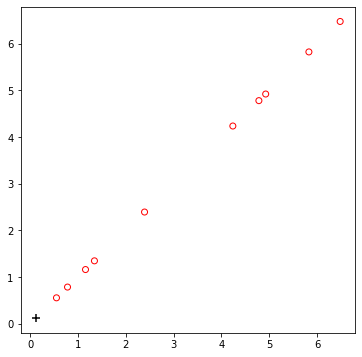

In [294]:
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax.scatter(x1, x1, facecolors='none', edgecolors='r');
ax.scatter(x2, x2, c='black', marker='+',s=80);

We want to predict the new (x,y) point. So we assert that if it is close to an existing x-value, it will be close to an existing y-value.

We can use the conditional normal distribution to approximate the set of possible values. It requires knowledge of the mean and variance. We do not have these for y-hat because it is unknown. We do know x-hat however.

So if we assert some relationship between the distances of the points we can approximate the mean and variance for y-hat, plug them into the function and come up with an estimate.

The question of whether the approximation was good or not is a separate conversation. There are techniques for calibrating. We can also select different kernels.

In [82]:
X = numpy.stack((x1.flatten(), x1.flatten()), axis=1).T
X

array([[0.76161962, 0.23763754, 0.72821635, 0.36778313, 0.63230583,
        0.63352971, 0.53577468, 0.09028977, 0.8353025 , 0.32078006],
       [0.76161962, 0.23763754, 0.72821635, 0.36778313, 0.63230583,
        0.63352971, 0.53577468, 0.09028977, 0.8353025 , 0.32078006]])

In [88]:
pandas.DataFrame(numpy.cov(x1.flatten(), x1.flatten()))

,0,1
0,0.061535,0.061535
1,0.061535,0.061535


In [123]:
def my_cov(X,Y):
    return (X - X.mean())*(Y - Y.mean())

my_cov(x1, x1)

array([[0.06115516],
       [0.07655535],
       [0.04574997],
       [0.0214742 ],
       [0.01391973],
       [0.01421002],
       [0.00046014],
       [0.17980496],
       [0.10302725],
       [0.03745922]])

In [89]:
pandas.DataFrame(numpy.cov(x1.flatten(), x2.flatten()))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 10 and the array at index 1 has size 1

In [90]:
def exponentiated_quadratic(x1, x2):
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * scipy.spatial.distance.cdist(x1, x2, 'sqeuclidean')
    return numpy.exp(sq_norm)

In [93]:
pandas.DataFrame(exponentiated_quadratic(x1, x1))

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.871727,0.999442,0.925377,0.991674,0.991830,0.974819,0.798243,0.997289,0.907402
1,0.871727,1.000000,0.886624,0.991567,0.925074,0.924627,0.956530,0.989203,0.836439,0.996550
2,0.999442,0.886624,1.000000,0.937109,0.995411,0.995527,0.981653,0.815890,0.994283,0.920349
3,0.925377,0.991567,0.937109,1.000000,0.965619,0.965306,0.985989,0.962230,0.896473,0.998896
4,0.991674,0.925074,0.995411,0.965619,1.000000,0.999999,0.995352,0.863388,0.979607,0.952634
5,0.991830,0.924627,0.995527,0.965306,0.999999,1.000000,0.995233,0.862815,0.979850,0.952270
6,0.974819,0.956530,0.981653,0.985989,0.995352,0.995233,1.000000,0.905536,0.956133,0.977154
7,0.798243,0.989203,0.815890,0.962230,0.863388,0.862815,0.905536,1.000000,0.757659,0.973787
8,0.997289,0.836439,0.994283,0.896473,0.979607,0.979850,0.956133,0.757659,1.000000,0.876020
9,0.907402,0.996550,0.920349,0.998896,0.952634,0.952270,0.977154,0.973787,0.876020,1.000000


In [122]:
tmp = scipy.spatial.distance.cdist(x1[0].reshape(-1,1), x1[0].reshape(-1,1), 'sqeuclidean')
print(tmp)
tmp = -0.5 * tmp
print(tmp)
numpy.exp(tmp)[0][0]

[[0.]]
[[-0.]]


1.0

(1, 1)

In [58]:
d = pandas.DataFrame(scipy.spatial.distance.cdist(x1, x1, 'sqeuclidean'))
d

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.274557,0.001116,0.155107,0.016722,0.016407,0.051006,0.450684,0.005429,0.194340
1,0.274557,0.000000,0.240668,0.016938,0.155763,0.156731,0.088886,0.021711,0.357203,0.006913
2,0.001116,0.240668,0.000000,0.129912,0.009199,0.008966,0.037034,0.406950,0.011467,0.166004
3,0.155107,0.016938,0.129912,0.000000,0.069972,0.070621,0.028221,0.077003,0.218574,0.002209
4,0.016722,0.155763,0.009199,0.069972,0.000000,0.000001,0.009318,0.293781,0.041208,0.097048
5,0.016407,0.156731,0.008966,0.070621,0.000001,0.000000,0.009556,0.295110,0.040712,0.097812
6,0.051006,0.088886,0.037034,0.028221,0.009318,0.009556,0.000000,0.198457,0.089717,0.046223
7,0.450684,0.021711,0.406950,0.077003,0.293781,0.295110,0.198457,0.000000,0.555044,0.053126
8,0.005429,0.357203,0.011467,0.218574,0.041208,0.040712,0.089717,0.555044,0.000000,0.264733
9,0.194340,0.006913,0.166004,0.002209,0.097048,0.097812,0.046223,0.053126,0.264733,0.000000


In [445]:
sampe_size = 10
sample_domain = (-6, 6)
x1 = numpy.linspace(start=sample_domain[0], stop=sample_domain[1], num=sampe_size)
x1 = numpy.reshape(x1, (-1,1))
e = numpy.random.normal(loc=0, scale=0.4, size=sampe_size)
e = numpy.reshape(e, (-1,1))
y1 = numpy.sin(x1) + e


f_x = numpy.linspace(start=sample_domain[0], stop=sample_domain[1], num=1000)
f_x = numpy.reshape(f_x, (-1,1))
f_y = numpy.sin(f_x)

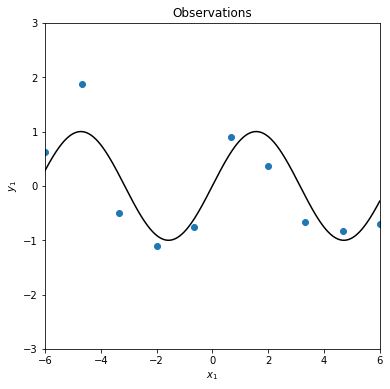

In [446]:
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax.plot(f_x, f_y, c='black')
ax.scatter(x1, y1)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$y_1$')
ax.set_title('Observations')
ax.axis([sample_domain[0], sample_domain[1], -3, 3])
pyplot.show();

In [447]:
# Let's look at a x-value that should return something close to 1
x2 = numpy.array([numpy.pi / 2])
x2 = numpy.reshape(x2, (-1,1))

In [448]:
def kernel(x1, x2):    
    return exponentiated_quadratic(x1, x2)

def exponentiated_quadratic(x1, x2):
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * scipy.spatial.distance.cdist(x1, x2, 'sqeuclidean')
    return numpy.exp(sq_norm)

In [449]:
# Calculate the variance and covariance matrices required for the conditional moments
Σ11 = kernel(x1, x1)
Σ12 = kernel(x1, x2)
Σ22 = kernel(x2, x2)

In [456]:
Σ11 = (x1 - x1.mean()) @ (x1 - x1.mean()).T
Σ12 = (x1 - x1.mean()) @ (x2 - x2.mean()).T
Σ22 = (x2 - x2.mean()) @ (x2 - x2.mean()).T

In [457]:
Σ12_Σ11 = scipy.linalg.solve(Σ11, Σ12, assume_a='pos').T

LinAlgError: Matrix is singular.

In [451]:
# Calculate conditional parameters
μ1 = 0
μ2 = 0

μ_2_given_1 = μ2 + Σ12_Σ11 @ (y1 - μ1)
Σ_2_given_1 = Σ22 - (Σ12_Σ11 @ Σ12)

In [452]:
y2 = numpy.random.multivariate_normal(mean=μ_2_given_1.flatten(), cov=Σ_2_given_1, size=5)
y2

array([[0.67154586],
       [0.92446195],
       [0.66150908],
       [0.43633342],
       [0.64656512]])

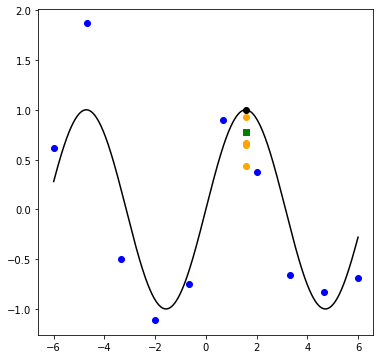

In [453]:
# Plot some samples from this function
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax.plot(f_x, f_y, c='black')
ax.scatter(x1, y1, c='blue')
ax.scatter(x2, y2[0], c='orange')
ax.scatter(x2, y2[1], c='orange')
ax.scatter(x2, y2[2], c='orange')
ax.scatter(x2, y2[3], c='orange')
ax.scatter(x2, y2[4], c='orange')
ax.scatter(x2, numpy.sin(x2), c='black')
ax.scatter(x2, μ_2_given_1, c='green', marker='s')
pyplot.show()